In [1]:
from model import load_model
from image_utils import imagenet_utils
import cv2 ,matplotlib.pyplot as plt
import numpy as np

In [2]:
test=load_model('VGG16')
model=test.model
input_dim=test.input_dim
layer_name='block5_conv3'
orig_img,img=imagenet_utils.load_test_img("both.png")
# orig_img,img=imagenet_utils.load_test_img("dog.jpg")

from explanation_models import gradcam,gradcam_robust,gradcam_plusplus,guided_backprop

In [3]:
# 281: 'tabby, tabby cat',
# 282: 'tiger cat',
#  242: 'boxer',

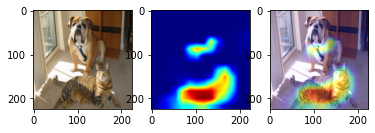

In [4]:
g= gradcam(model,layer_name,input_dim)
heatmap=g.get_heatmap(img,242,True)
heatmap_colormap,overlayed_img=imagenet_utils.overlay_heatmap(orig_img,heatmap)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(orig_img)
axarr[1].imshow(heatmap_colormap)
axarr[2].imshow(overlayed_img)

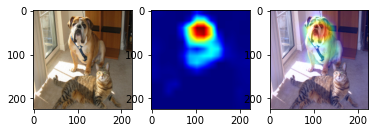

In [5]:
g= gradcam(model,layer_name,input_dim)
heatmap=g.get_heatmap(img,282,True)
heatmap_colormap,overlayed_img=imagenet_utils.overlay_heatmap(orig_img,heatmap)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(orig_img)
axarr[1].imshow(heatmap_colormap)
axarr[2].imshow(overlayed_img)